**SALES PREDICTION USING MACHINE LEARNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/advertising.csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


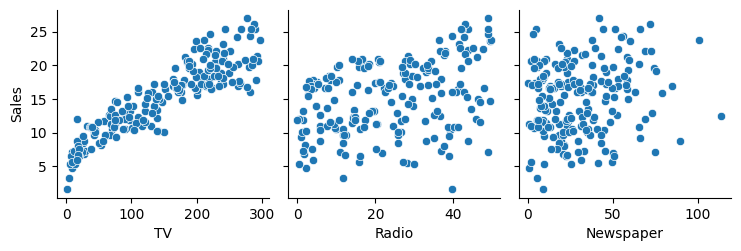

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

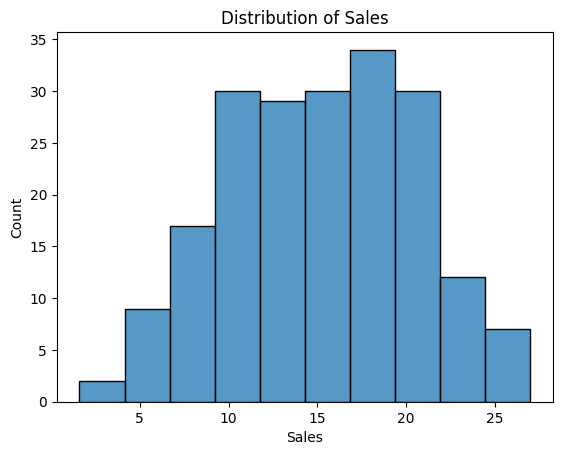

In [ ]:
sns.histplot(df['Sales'])
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')
plt.show()

<Axes: >

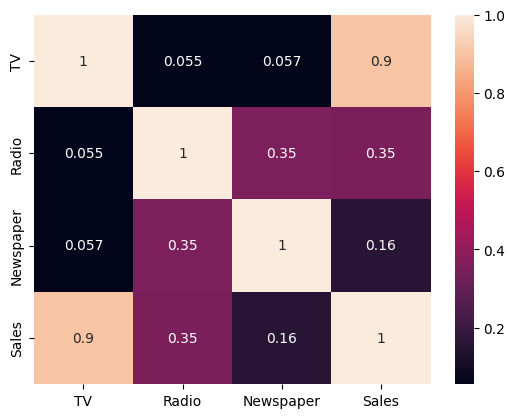

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
X =df[['TV','Radio','Newspaper']]
Y= df['Sales']

**SPLITTING INTO TRAINING AND TESTING SET**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(200, 3) (160, 3) (40, 3)


**MODEL TRAINING USING XGBRegressor**



In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor .fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**MODEL PREDICTION AND PERFORMANCE EVALUATON**

In [ ]:
training_data_prediction=regressor.predict(X_train)

In [ ]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.9999997989781666


In [ ]:
testing_data_prediction=regressor.predict(X_test)

In [ ]:
r2_test = metrics.r2_score(Y_test, testing_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.9288002748614559


In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
rmse = np.sqrt(MSE(Y_test,testing_data_prediction ))

In [ ]:
print(rmse)

1.1701763409273829


**MAKING PREDICTION**

In [ ]:
arr=np.array([[38.2,3.7,13.8]])
prediction=regressor.predict(arr)
print(prediction)

[7.6004705]


**USING LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred_linear = linear_model.predict(X_test)



In [ ]:
# Calculate metrics for Linear Regression
linear_mse = mean_squared_error(Y_test, y_pred_linear)
linear_r2 = r2_score(Y_test, y_pred_linear)


In [ ]:

# Print metrics
print("Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared Score:", linear_r2)
print()

Linear Regression:
Mean Squared Error: 2.409333612892369
R-squared Score: 0.8747226291661847



**MAKING PREDICTION BY LINEAR REGRESSION**

In [ ]:
arr=np.array([[38.2,3.7,13.8]])
prediction=linear_model.predict(arr)
print(prediction)

[7.11060984]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**USING DECISION TREE REGRESSION**

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)
y_pred_dt = dt_model.predict(X_test)



**PERFORMANCE EVALUATION**

In [ ]:
dt_mse = mean_squared_error(Y_test, y_pred_dt)
dt_r2 = r2_score(Y_test, y_pred_dt)

print("Decision Tree Regression:")
print("Mean Squared Error:", dt_mse)
print("R-squared Score:", dt_r2)
print()

Decision Tree Regression:
Mean Squared Error: 1.8839999999999992
R-squared Score: 0.9020382377152135



**MAKING PREDICTION**

In [ ]:
arr=np.array([[38.2,3.7,13.8]])
prediction=dt_model.predict(arr)
print(prediction)

[7.6]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


**USING RANDOM FOREST REGRESSION**

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)

**PERFORMANCE EVALUATION**

In [ ]:
rf_mse = mean_squared_error(Y_test, y_pred_rf)
rf_r2 = r2_score(Y_test, y_pred_rf)

print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("R-squared Score:", rf_r2)

Random Forest Regression:
Mean Squared Error: 0.9343980500000031
R-squared Score: 0.9514143950883925


**MAKING PREDICTION**

In [ ]:
arr=np.array([[38.2,3.7,13.8]])
prediction=rf_model.predict(arr)
print(prediction)

[8.048]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
